In [27]:
import os
print(os.getcwd())
# change working directory to project root
import platform
if platform.system() is "Windows":
    os.chdir('G:\\sven\\git\\cardio')
else:
    os.chdir('/Users/minority/Code/Git/cardio')
print(os.getcwd())
from src.utils.utils_io import Console_and_file_logger, ensure_dir
from src.data.dataset import image_slice, show_slice
from src.data.dataset import load_data

import logging
Console_and_file_logger('Dataloader_3d', logging.INFO)

# specific imports
import re
import glob
import numpy as np
from scipy import stats
from collections import OrderedDict
import json
import SimpleITK as sitk
from collections import Counter
from ipywidgets import interact
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline


# image slice imports
import random
import numpy as np
import pandas as pd
import logging
import matplotlib.pyplot as plt
import glob
import os
import SimpleITK as sitk
from numpy import newaxis
from skimage.transform import resize
from src.utils.utils_io import ensure_dir



G:\sven\git\cardio
G:\sven\git\cardio


In [3]:
@interact
def load_nii(file=glob.glob('data/raw/ACDC/small/**/*frame*.nii.gz')):
    print(file)
    img = sitk.ReadImage(file)
    img_nda = sitk.GetArrayFromImage(img)
    print('Shape: {}'.format(img_nda.shape))
    for slice in img_nda:
        print(slice.shape)
        show_slice(img=slice)


interactive(children=(Dropdown(description='file', options=('data/raw/ACDC/small\\patient001\\patient001_frame…

In [ ]:
file='data/raw/ACDC/small/patient001/patient001_frame01_gt.nii.gz'
print(file)
img = sitk.ReadImage(file)
img_nda = sitk.GetArrayFromImage(img)

In [4]:
def load_acdc_files(path):
    
    """
    path: root path for all acdc patient folder
    returns: a tuple (images, masks) with full file names
    """
    
    assert(os.path.exists(path)), 'Path: {} does not exist'.format(path)
    
    images = images = glob.glob(os.path.join(path, '**/*frame[0-9][0-9].nii.gz'), recursive = True)
    masks = glob.glob(os.path.join(path, '**/*frame*_gt.nii.gz'), recursive = True)
    
    return images, masks
    
    
    
    

In [5]:
def load_acdc_data(path, create=True):
    
    """
    path: root path for acdc patient folders
    returns: a tuple (images, masks) with image_slice wrappers
    """
    
    
    
    images = []
    masks = []
    numpy_postfix = 'numpy'
    numpy_path = os.path.join(path, numpy_postfix)
    ensure_dir(numpy_path)
    
    if create:
        image_files, mask_files = load_acdc_files(path)
        logging.info('Found raw 3d img: {} and mask{}'.format(len(image_files),len(mask_files)))
        
        for img_f, msk_f in zip(image_files, mask_files):

            # slice ES and ED timesteps from filename
            t = msk_f.split('_gt.nii.gz')[0][-2:]

            img_3d = sitk.ReadImage(img_f)
            msk_3d = sitk.ReadImage(msk_f)

            img_3d_nda = sitk.GetArrayFromImage(img_3d)
            msk_3d_nda = sitk.GetArrayFromImage(msk_3d)

            assert(img_3d_nda.shape[0] == msk_3d_nda.shape[0]), 'Image {}, and mask {} in different shape.'.format(img_f, msk_f)

            for z in range(img_3d_nda.shape[0]):

                images.append(image_slice(numpy_path,img_3d_nda[z,:,:],img_f, t, z, create, type_of='img'))
                masks.append(image_slice(numpy_path,msk_3d_nda[z,:,:],msk_f, t, z, create, type_of='masks'))
        
    if not create:
        
        logging.info('Use numpy subdir: {}'.format(numpy_path))
        assert(os.path.exists(numpy_path)), 'Numpy path does not exist'
        
        # get a list of all numpy images/ masks
        img = glob.glob(os.path.join(numpy_path, '*[0-9].nii_*.npy'))
        msk = glob.glob(os.path.join(numpy_path, '*_gt.nii_*.npy'))
        logging.info('found {} slices in {}'.format(len(img), numpy_path))
        # instantiate all image_slice objects as wrapper
        images = [image_slice(path=i_name, create=create, type_of = 'img') for i_name in img]
        masks = [image_slice(path=m_name, create=create, type_of = 'mask') for m_name in msk]
    
    
    
    return images, masks
        
        
        

In [8]:
image_s, mask_s = load_acdc_data('data/raw/ACDC/training/', create=False)

2019-03-03 10:53:46,478 INFO Use numpy subdir: data/raw/ACDC/training/numpy
2019-03-03 10:53:46,556 INFO found 1656 slices in data/raw/ACDC/training/numpy


<Figure size 432x288 with 0 Axes>

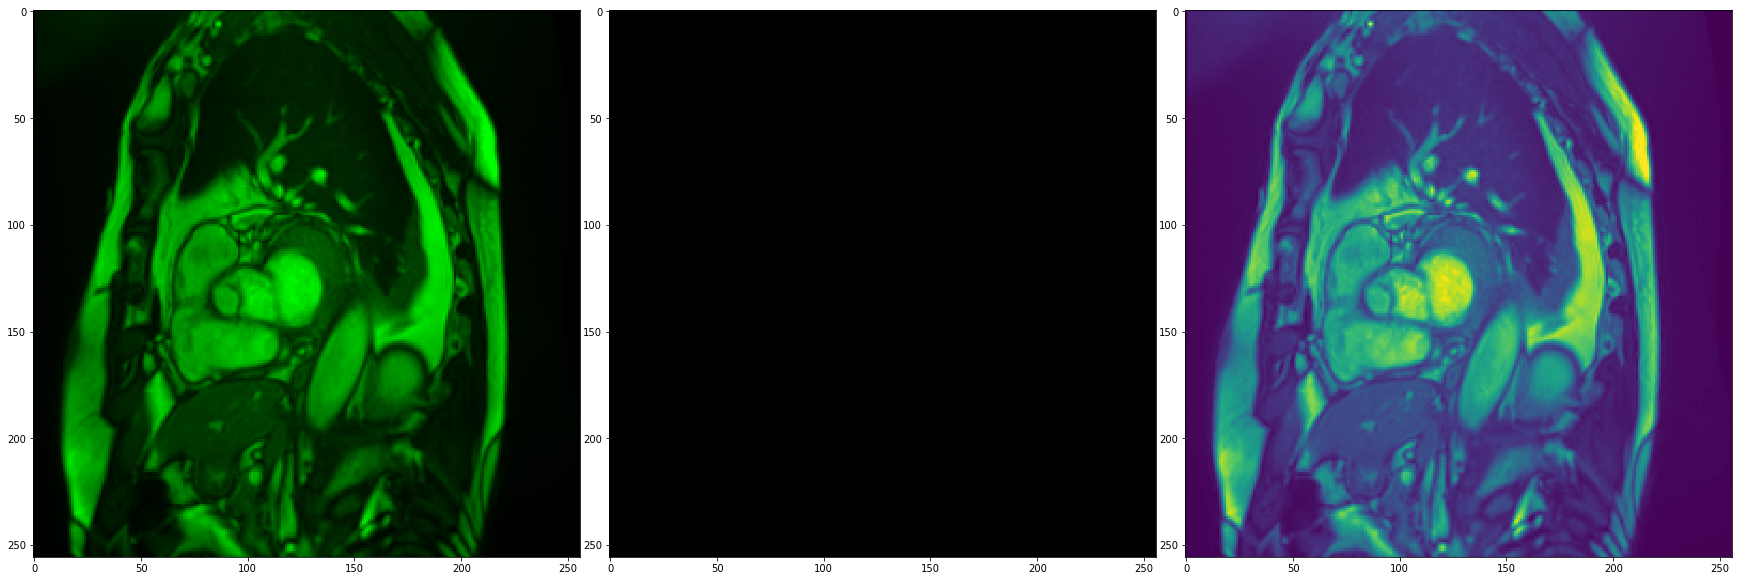

2019-03-03 10:54:08,263 INFO Image-shape: (256, 256)
2019-03-03 10:54:08,279 INFO Image data points: 64421
2019-03-03 10:54:08,279 INFO Image mean: 0.23649390388875338
2019-03-03 10:54:08,279 INFO Image max: 1.0
2019-03-03 10:54:08,279 INFO Image min: 0.0
2019-03-03 10:54:08,279 INFO Mask-shape: (256, 256, 3)
2019-03-03 10:54:08,279 INFO LV-endo-mask data points: 0
2019-03-03 10:54:08,279 INFO LV-epi-mask data points: 0
2019-03-03 10:54:08,279 INFO RV-mask data points: 0
2019-03-03 10:54:08,279 INFO LV-endo-mask mean: 0.0
2019-03-03 10:54:08,279 INFO LV-epi-mask mean: 0.0
2019-03-03 10:54:08,279 INFO RV-mask mean: 0.0


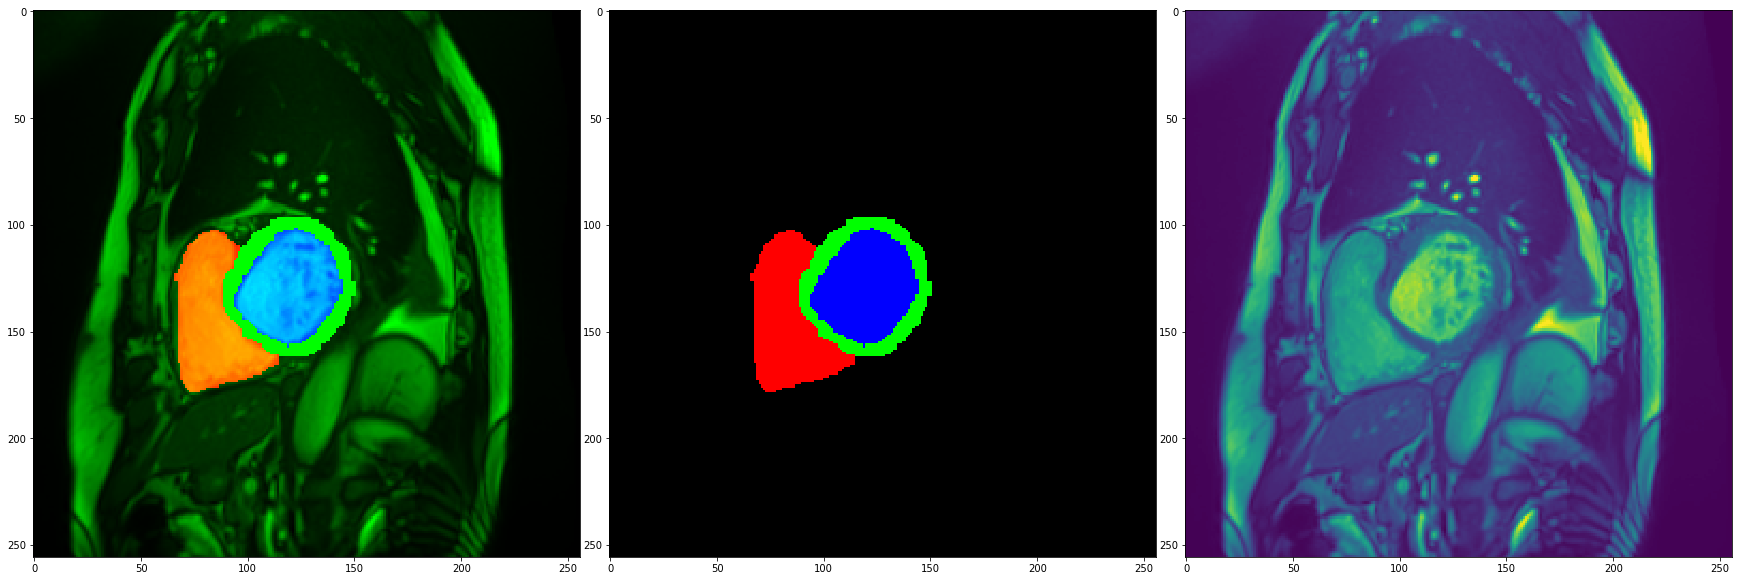

2019-03-03 10:54:09,844 INFO Image-shape: (256, 256)
2019-03-03 10:54:09,844 INFO Image data points: 64384
2019-03-03 10:54:09,844 INFO Image mean: 0.2128805168654645
2019-03-03 10:54:09,844 INFO Image max: 1.0
2019-03-03 10:54:09,844 INFO Image min: 0.0
2019-03-03 10:54:09,844 INFO Mask-shape: (256, 256, 3)
2019-03-03 10:54:09,860 INFO LV-endo-mask data points: 2034
2019-03-03 10:54:09,860 INFO LV-epi-mask data points: 1149
2019-03-03 10:54:09,860 INFO RV-mask data points: 1898
2019-03-03 10:54:09,860 INFO LV-endo-mask mean: 0.031036376953125
2019-03-03 10:54:09,860 INFO LV-epi-mask mean: 0.0175323486328125
2019-03-03 10:54:09,860 INFO RV-mask mean: 0.028961181640625


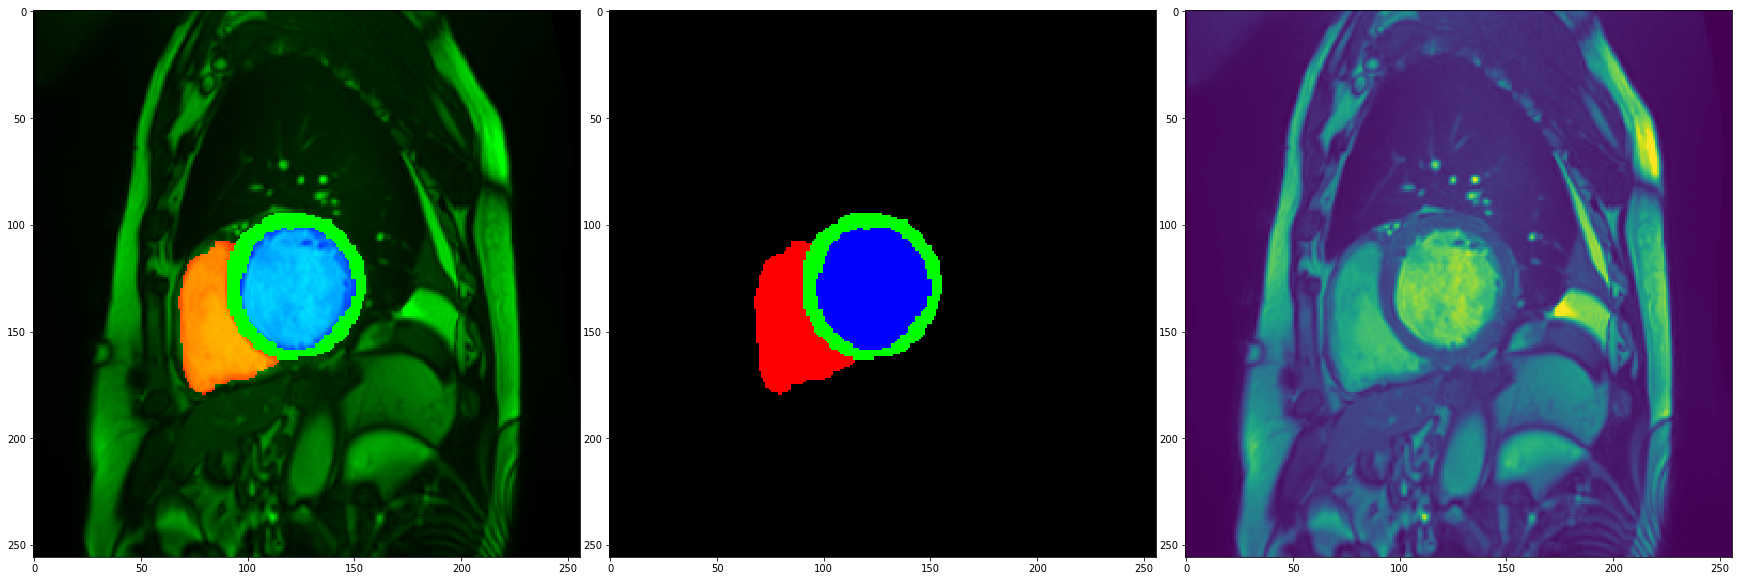

2019-03-03 10:54:11,219 INFO Image-shape: (256, 256)
2019-03-03 10:54:11,219 INFO Image data points: 64524
2019-03-03 10:54:11,219 INFO Image mean: 0.20743548416358837
2019-03-03 10:54:11,219 INFO Image max: 1.0
2019-03-03 10:54:11,219 INFO Image min: 0.0
2019-03-03 10:54:11,219 INFO Mask-shape: (256, 256, 3)
2019-03-03 10:54:11,219 INFO LV-endo-mask data points: 1745
2019-03-03 10:54:11,219 INFO LV-epi-mask data points: 1232
2019-03-03 10:54:11,219 INFO RV-mask data points: 2330
2019-03-03 10:54:11,219 INFO LV-endo-mask mean: 0.0266265869140625
2019-03-03 10:54:11,219 INFO LV-epi-mask mean: 0.018798828125
2019-03-03 10:54:11,234 INFO RV-mask mean: 0.035552978515625


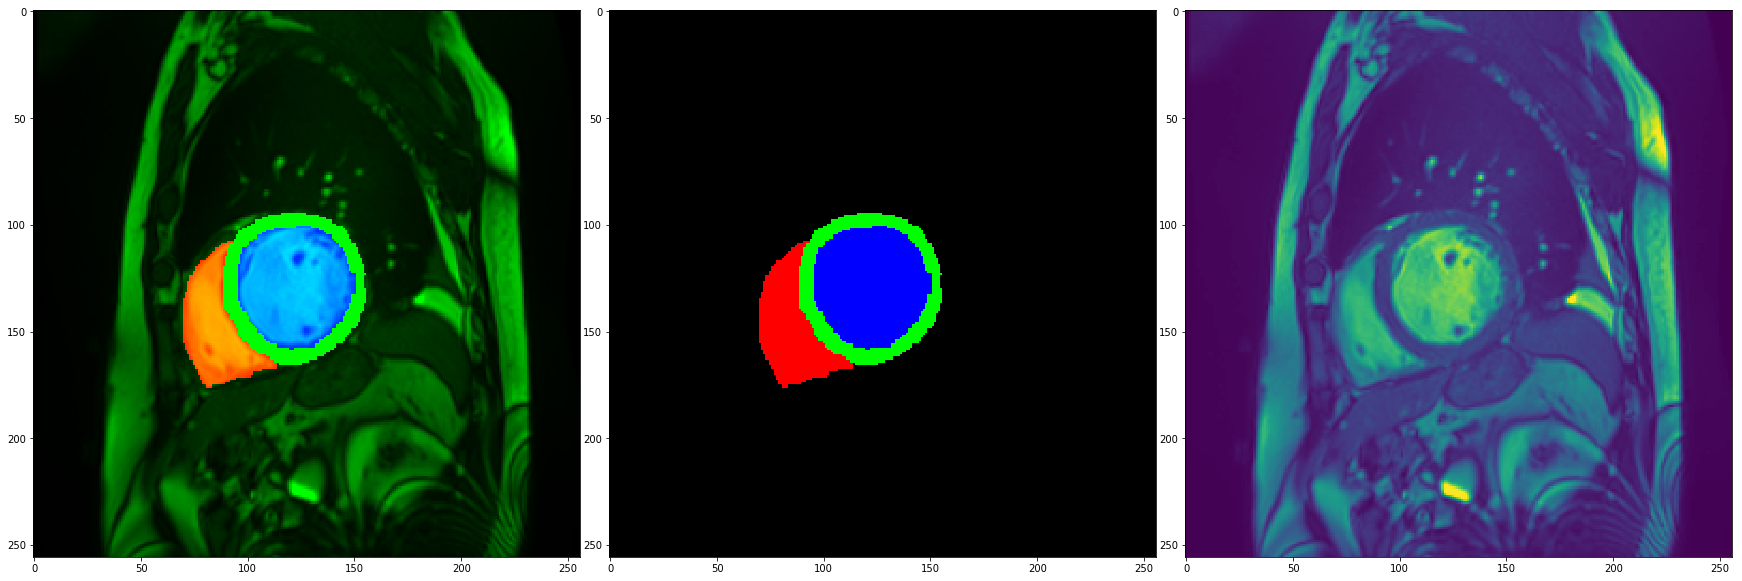

2019-03-03 10:54:12,581 INFO Image-shape: (256, 256)
2019-03-03 10:54:12,581 INFO Image data points: 64527
2019-03-03 10:54:12,597 INFO Image mean: 0.1931804476694961
2019-03-03 10:54:12,597 INFO Image max: 1.0
2019-03-03 10:54:12,597 INFO Image min: 0.0
2019-03-03 10:54:12,597 INFO Mask-shape: (256, 256, 3)
2019-03-03 10:54:12,597 INFO LV-endo-mask data points: 1399
2019-03-03 10:54:12,597 INFO LV-epi-mask data points: 1308
2019-03-03 10:54:12,597 INFO RV-mask data points: 2468
2019-03-03 10:54:12,597 INFO LV-endo-mask mean: 0.0213470458984375
2019-03-03 10:54:12,597 INFO LV-epi-mask mean: 0.01995849609375
2019-03-03 10:54:12,597 INFO RV-mask mean: 0.03765869140625


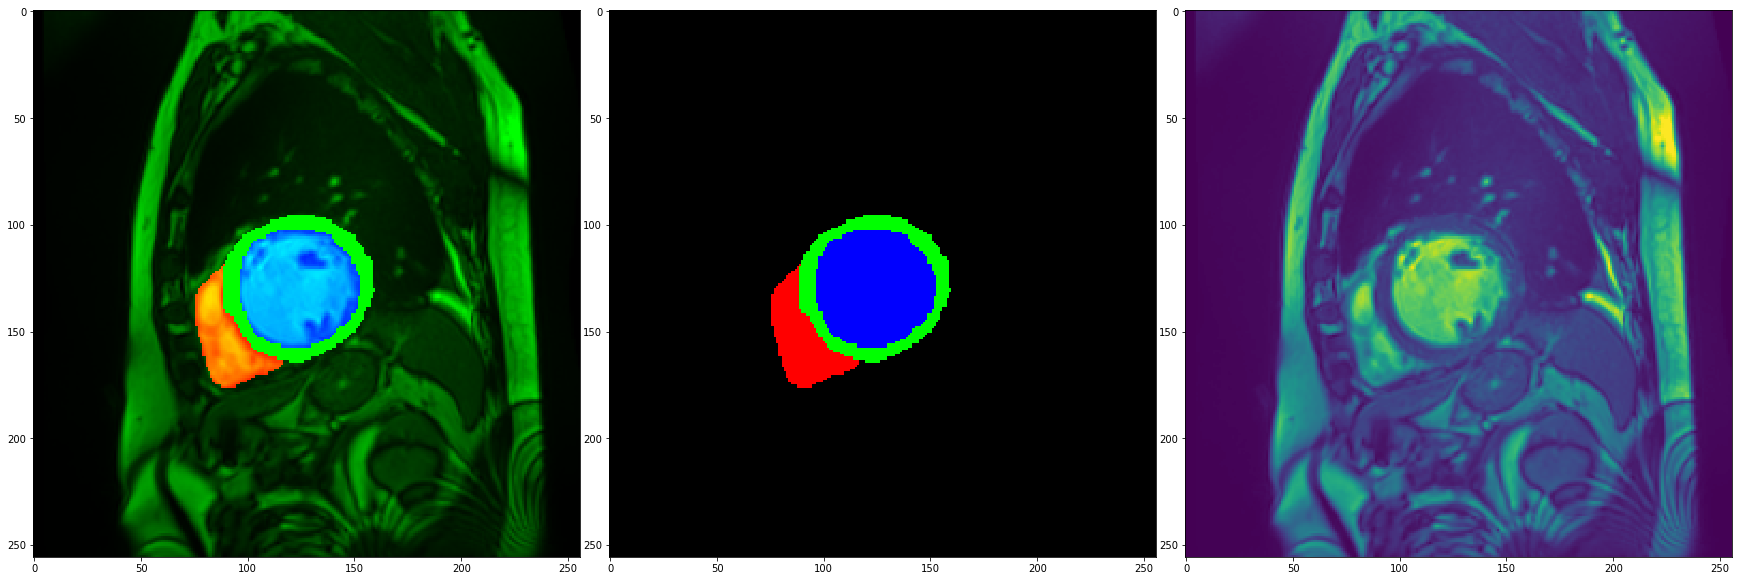

2019-03-03 10:54:14,084 INFO Image-shape: (256, 256)
2019-03-03 10:54:14,084 INFO Image data points: 64307
2019-03-03 10:54:14,084 INFO Image mean: 0.20227190315009538
2019-03-03 10:54:14,084 INFO Image max: 1.0
2019-03-03 10:54:14,084 INFO Image min: 0.0
2019-03-03 10:54:14,099 INFO Mask-shape: (256, 256, 3)
2019-03-03 10:54:14,099 INFO LV-endo-mask data points: 1021
2019-03-03 10:54:14,099 INFO LV-epi-mask data points: 1256
2019-03-03 10:54:14,099 INFO RV-mask data points: 2493
2019-03-03 10:54:14,099 INFO LV-endo-mask mean: 0.0155792236328125
2019-03-03 10:54:14,099 INFO LV-epi-mask mean: 0.0191650390625
2019-03-03 10:54:14,099 INFO RV-mask mean: 0.0380401611328125


In [10]:
for img, mask in zip(image_s[:5], mask_s[:5]):
    show_slice(img.load(), mask.load())

2019-03-03 10:55:01,210 INFO Use numpy subdir: data/processed/train/numpy


<Figure size 432x288 with 0 Axes>

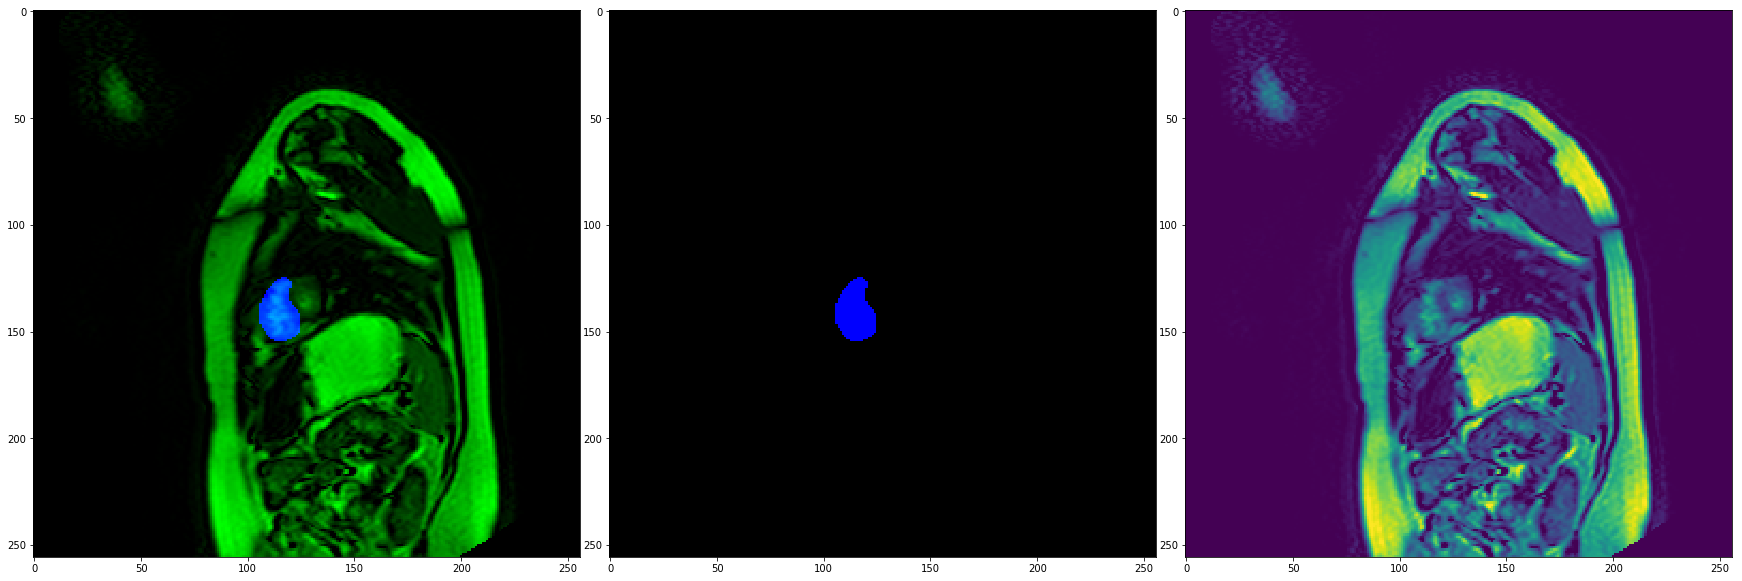

2019-03-03 10:55:03,418 INFO Image-shape: (256, 256)
2019-03-03 10:55:03,418 INFO Image data points: 41726
2019-03-03 10:55:03,418 INFO Image mean: 0.14809026473607897
2019-03-03 10:55:03,433 INFO Image max: 1.0
2019-03-03 10:55:03,433 INFO Image min: 0.0
2019-03-03 10:55:03,433 INFO Mask-shape: (256, 256, 3)
2019-03-03 10:55:03,433 INFO LV-endo-mask data points: 0
2019-03-03 10:55:03,433 INFO LV-epi-mask data points: 0
2019-03-03 10:55:03,433 INFO RV-mask data points: 411
2019-03-03 10:55:03,433 INFO LV-endo-mask mean: 0.0
2019-03-03 10:55:03,433 INFO LV-epi-mask mean: 0.0
2019-03-03 10:55:03,433 INFO RV-mask mean: 0.0062713623046875


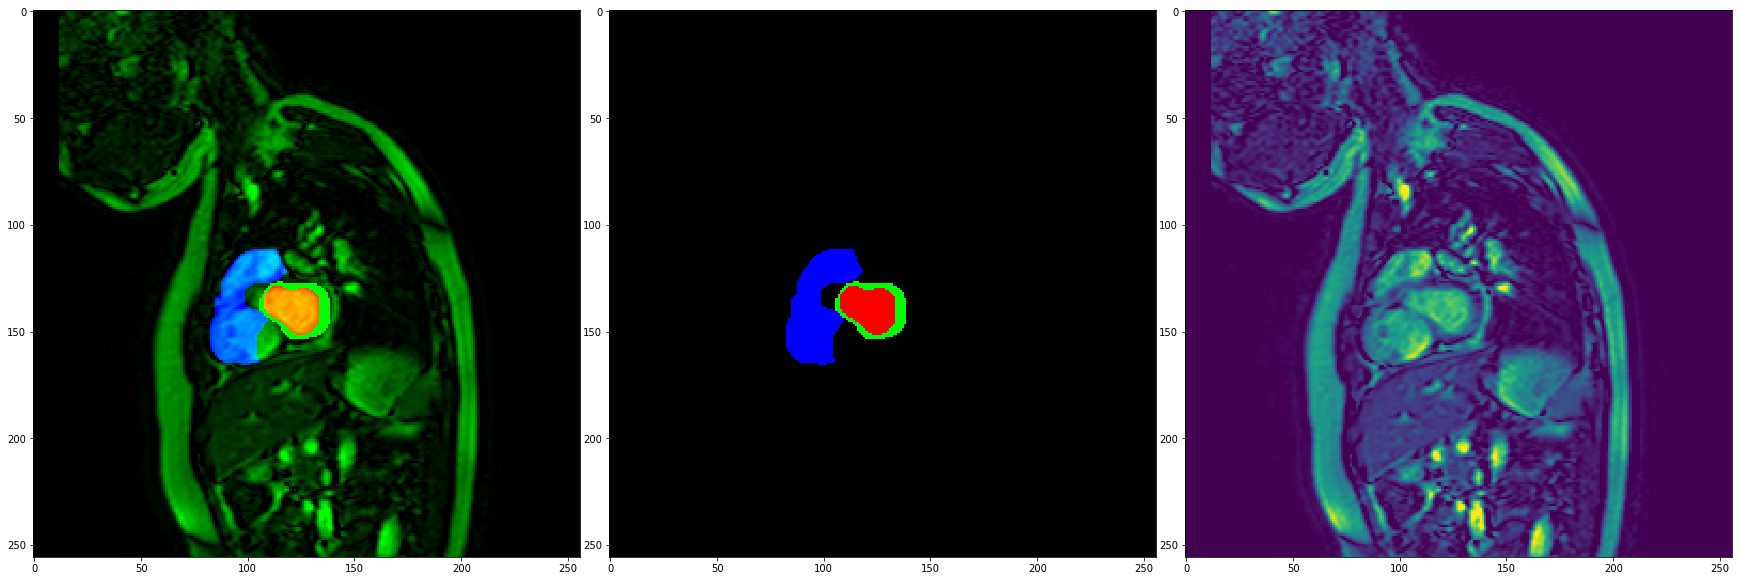

2019-03-03 10:55:05,001 INFO Image-shape: (256, 256)
2019-03-03 10:55:05,001 INFO Image data points: 45232
2019-03-03 10:55:05,001 INFO Image mean: 0.12046497855770355
2019-03-03 10:55:05,001 INFO Image max: 1.0
2019-03-03 10:55:05,001 INFO Image min: 0.0
2019-03-03 10:55:05,017 INFO Mask-shape: (256, 256, 3)
2019-03-03 10:55:05,017 INFO LV-endo-mask data points: 447
2019-03-03 10:55:05,017 INFO LV-epi-mask data points: 247
2019-03-03 10:55:05,017 INFO RV-mask data points: 1090
2019-03-03 10:55:05,017 INFO LV-endo-mask mean: 0.0068206787109375
2019-03-03 10:55:05,017 INFO LV-epi-mask mean: 0.0037689208984375
2019-03-03 10:55:05,017 INFO RV-mask mean: 0.016632080078125


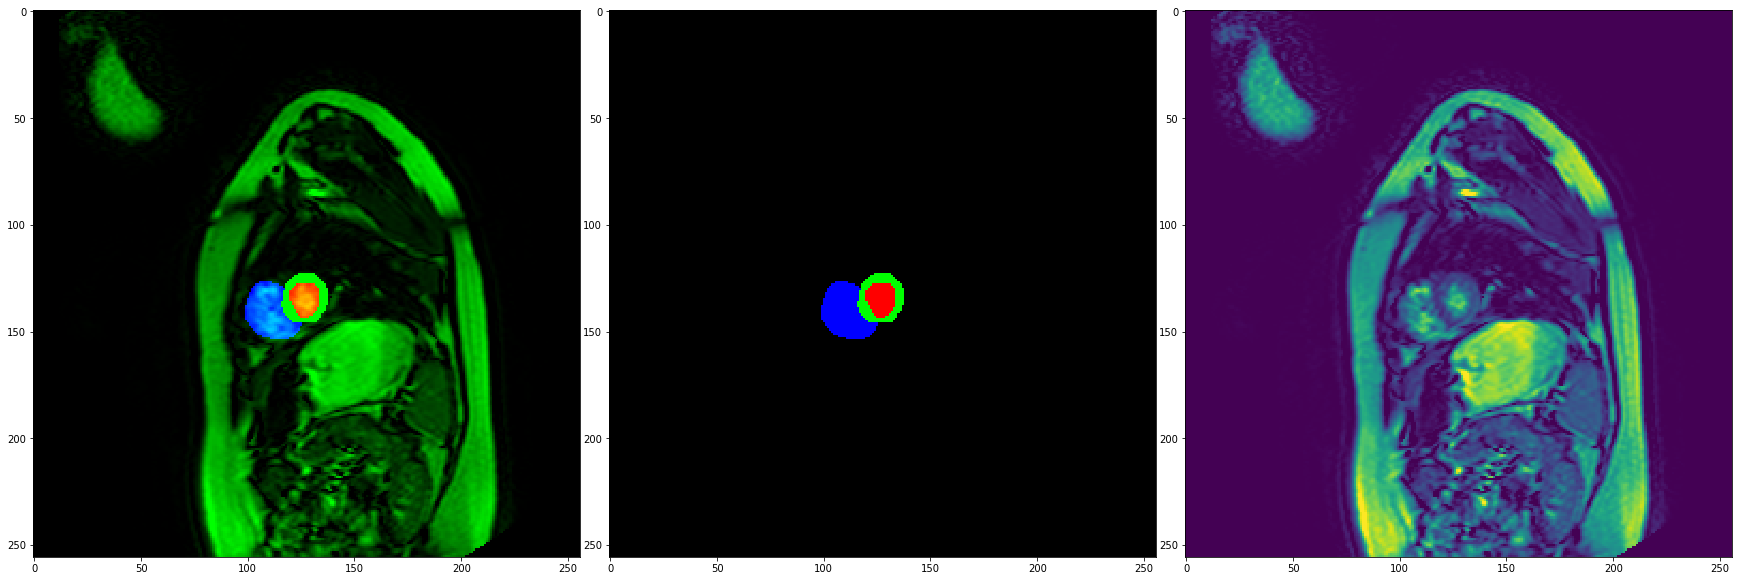

2019-03-03 10:55:06,364 INFO Image-shape: (256, 256)
2019-03-03 10:55:06,364 INFO Image data points: 42376
2019-03-03 10:55:06,364 INFO Image mean: 0.14553996298554756
2019-03-03 10:55:06,364 INFO Image max: 1.0
2019-03-03 10:55:06,364 INFO Image min: 0.0
2019-03-03 10:55:06,364 INFO Mask-shape: (256, 256, 3)
2019-03-03 10:55:06,364 INFO LV-endo-mask data points: 182
2019-03-03 10:55:06,364 INFO LV-epi-mask data points: 228
2019-03-03 10:55:06,364 INFO RV-mask data points: 468
2019-03-03 10:55:06,364 INFO LV-endo-mask mean: 0.002777099609375
2019-03-03 10:55:06,364 INFO LV-epi-mask mean: 0.00347900390625
2019-03-03 10:55:06,364 INFO RV-mask mean: 0.00714111328125


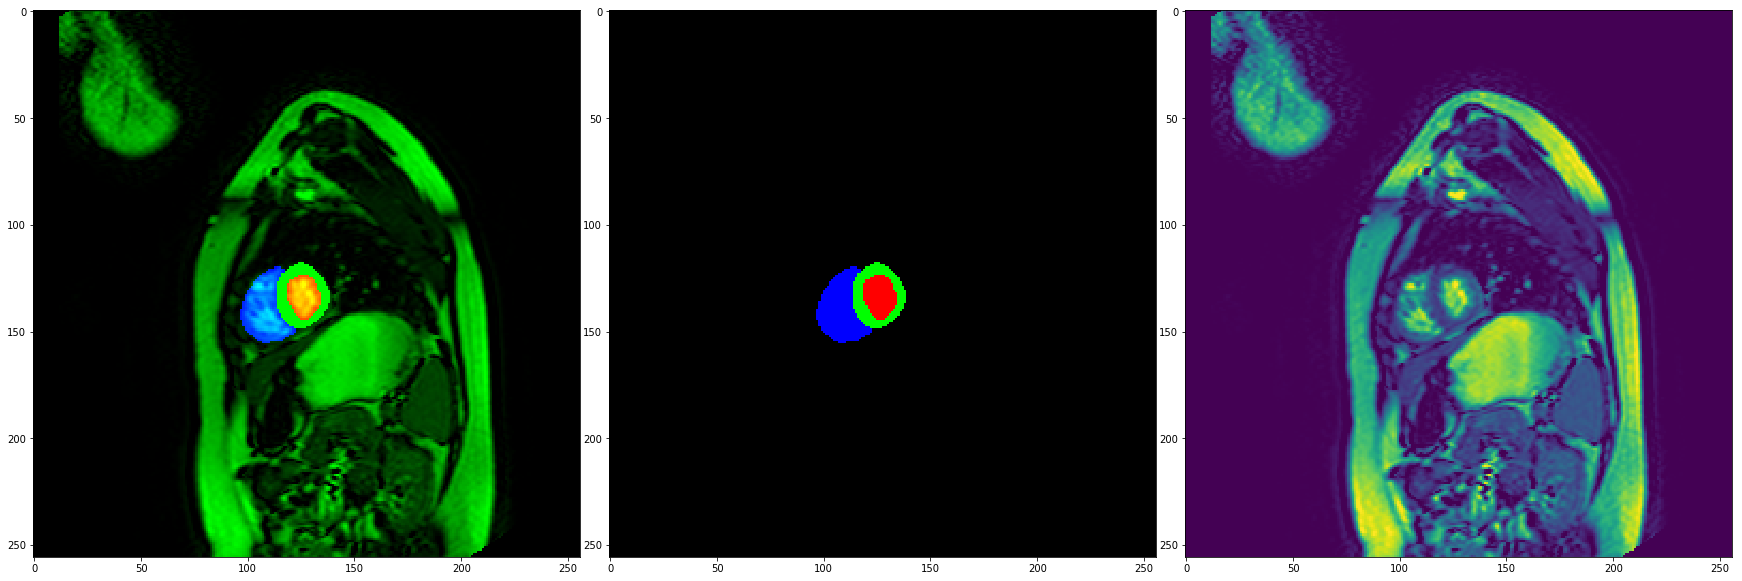

2019-03-03 10:55:07,899 INFO Image-shape: (256, 256)
2019-03-03 10:55:07,899 INFO Image data points: 42438
2019-03-03 10:55:07,915 INFO Image mean: 0.16416637714092625
2019-03-03 10:55:07,915 INFO Image max: 1.0
2019-03-03 10:55:07,915 INFO Image min: 0.0
2019-03-03 10:55:07,915 INFO Mask-shape: (256, 256, 3)
2019-03-03 10:55:07,915 INFO LV-endo-mask data points: 254
2019-03-03 10:55:07,915 INFO LV-epi-mask data points: 332
2019-03-03 10:55:07,915 INFO RV-mask data points: 539
2019-03-03 10:55:07,915 INFO LV-endo-mask mean: 0.003875732421875
2019-03-03 10:55:07,915 INFO LV-epi-mask mean: 0.00506591796875
2019-03-03 10:55:07,915 INFO RV-mask mean: 0.0082244873046875


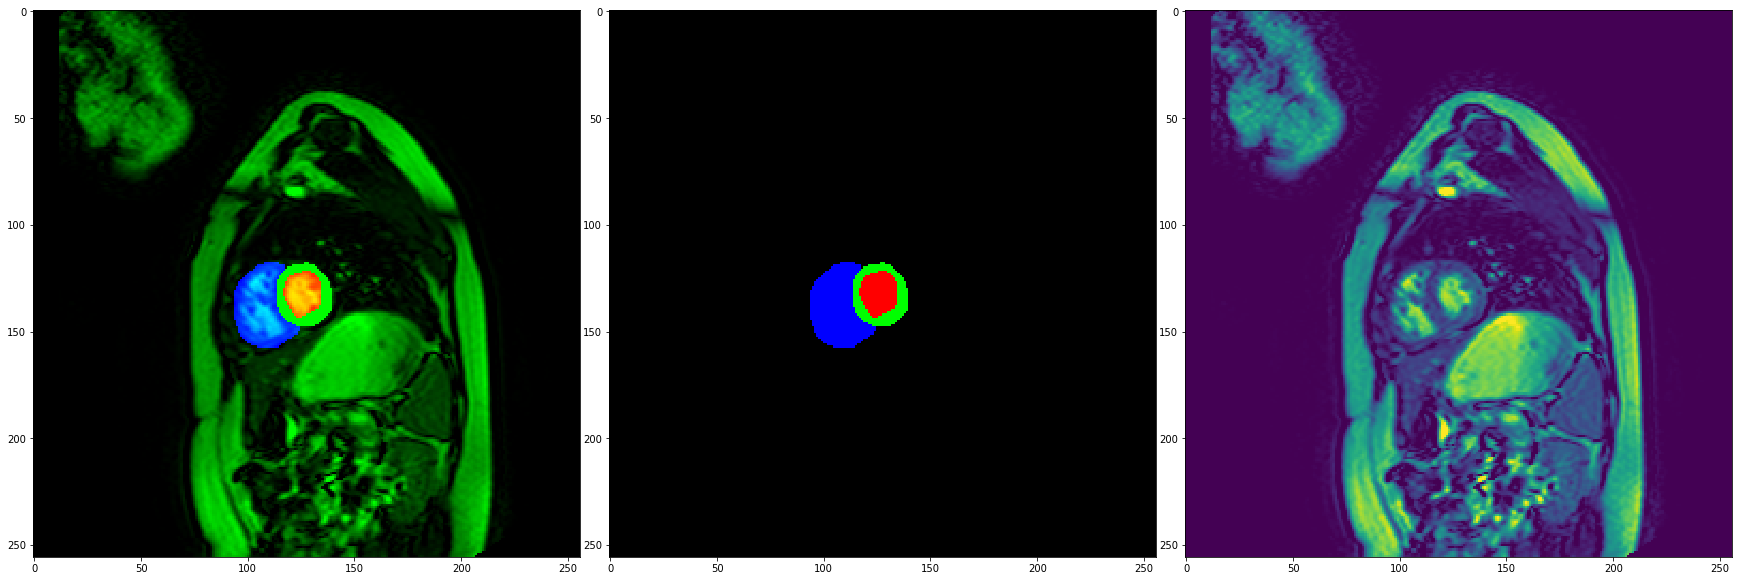

2019-03-03 10:55:09,562 INFO Image-shape: (256, 256)
2019-03-03 10:55:09,562 INFO Image data points: 43323
2019-03-03 10:55:09,562 INFO Image mean: 0.15415169852120708
2019-03-03 10:55:09,562 INFO Image max: 1.0
2019-03-03 10:55:09,562 INFO Image min: 0.0
2019-03-03 10:55:09,562 INFO Mask-shape: (256, 256, 3)
2019-03-03 10:55:09,562 INFO LV-endo-mask data points: 303
2019-03-03 10:55:09,562 INFO LV-epi-mask data points: 328
2019-03-03 10:55:09,578 INFO RV-mask data points: 798
2019-03-03 10:55:09,578 INFO LV-endo-mask mean: 0.0046234130859375
2019-03-03 10:55:09,578 INFO LV-epi-mask mean: 0.0050048828125
2019-03-03 10:55:09,578 INFO RV-mask mean: 0.012176513671875


In [11]:
image_s, mask_s = load_data('data/processed/train/', create=False)
for img, mask in zip(image_s[:5], mask_s[:5]):
    show_slice(img.load(), mask.load())

In [29]:
def load_data(path, create = True):
    
    """
    loads all images and masks in a given directory
    filters all images without a mask
    create an image slice wrapper around each file and returns
    a tuple with x_image_slice_list, y_image_slice_list
    """
    
    
    images = []
    masks = []
    mask_prefix = 'masks'
    img_prefix = 'images'
    numpy_postfix = 'numpy'

    masks_path = os.path.join(path, mask_prefix)
    images_path = os.path.join(path, img_prefix)
    numpy_path = os.path.join(path, numpy_postfix)
    
    if create:
        logging.info('laod 4D volumes and create numpy files for : {}'.format(path))
        ensure_dir(numpy_path)

        mask_files = [f_name for f_name in sorted(os.listdir(masks_path))]
        logging.info('mask files: {}'.format(len(mask_files)))

        image_files = [f_name for f_name in sorted(os.listdir(images_path))]
        logging.info('image files: {}'.format(len(image_files)))

        for idx, _ in enumerate(mask_files):

            # build full file paths
            mask_f_name = os.path.join(masks_path, mask_files[idx])
            image_f_name = os.path.join(images_path, image_files[idx])

            # load 4d volumes
            mask = sitk.ReadImage(mask_f_name)
            mask_nda = sitk.GetArrayFromImage(mask)

            img = sitk.ReadImage(image_f_name)
            img_nda = sitk.GetArrayFromImage(img)

            for t in range(mask_nda.shape[0]): # traverse through time
                # load only the masked timesteps
                    for z in range(mask_nda.shape[1]): # traverse through the volume
                        if mask_nda[t,z,:,:].max() > 0:
                            # load only images where we have a mask
                            masks.append(image_slice(numpy_path,mask_nda[t,z,:,:],mask_f_name, t, z, create, type_of='masks'))
                            images.append(image_slice(numpy_path,img_nda[t,z,:,:],image_f_name, t, z, create, type_of='img'))

    else:
        logging.info('Use numpy subdir: {}'.format(numpy_path))
        assert(os.path.exists(numpy_path)), 'Numpy path does not exist'
        
        # get a list of all numpy images/ masks
        img = glob.glob(os.path.join(numpy_path, '*_clean_*.npy'))
        msk = glob.glob(os.path.join(numpy_path, '*_mask_*.npy'))
        # instantiate all image_slice objects as wrapper
        images = [image_slice(path=i_name, create=create, type_of = 'img') for i_name in img]
        masks = [image_slice(path=m_name, create=create, type_of = 'mask') for m_name in msk]
    
    return images, masks

In [30]:
class image_slice():
    """
    Helper class to make realtime dataloading possible
    """
    def __init__(self, path='', numpy_array = '', vol_name='', t='' , z='', create=True, type_of='img'):
        
        #plt.clf()
        self.dim = (256, 256)
        self.mask_values = [3, 2, 1]
        self.n_classes = len(self.mask_values)
        self.type_of = type_of
            
        if create:
            self.base_path = path
            self.t = t
            self.z = z

            self.volume_name = vol_name
            ensure_dir(self.base_path)
            self.shape = numpy_array.shape
            
            # create numpy filename from volume name & t, z indicies & file-suffix
            base_name = os.path.splitext(os.path.basename(vol_name))[0]
            self.base_name = '{}_{}_{}.npy'.format(base_name, str(t), str(z))
            self.f_name = os.path.join(self.base_path, self.base_name)
            
            np.save(self.f_name, numpy_array)
            del(numpy_array)
        else:
            # numpy file already stored, use path as f_name
            self.f_name = path
            
    
    def __load_raw(self):
        
        """
        Load numpy file without any preprocessing
        """
        return np.load(self.f_name)
        
        
    def load(self, dim=(256, 256), cls=[3,2,1]):
        
        """
        External entry point to get a preprocessed image/ mask
        dim: define the image size --> (256, 256)
        cls: define the label values for channel creating
        """
        
        self.dim = dim
        self.mask_values = cls
        self.n_classes = len(self.mask_values)
        
        if self.type_of == 'img':
            return self.load_image()
        else:
            return self.load_mask()
            
    
    def load_image(self):
        
        """
        internal function to load and preprocess an image
        preprocessing: resize & normalize
        """
 
        img = np.load(self.f_name)[:,:,newaxis]
        h, w = img.shape[:2]

        if h != w:
            margin = (h - w)//2

            # crop
            if margin > 0:
                img = img[margin:-margin,:,:]
            elif margin < 0:
                margin = -margin
                img = img[:,margin:-margin,:]

        # resize
        img = resize(img, (*self.dim, 1), mode='constant', preserve_range=True, anti_aliasing=True, clip=True, order=1)

        # clip to values between 0 and .99 quantile
        ninenine_q = np.quantile(img.flatten(), .999, overwrite_input=False)
        img = np.clip(img, 0, ninenine_q)
        
        # normalize to values between 0 and 1
        img = (img-img.min())/(img.max()-img.min())

        return img
    
    def load_mask(self):
        """
        internal function to load and preprocess a mask
        preprocessing: resize, extract class labels, create one boolian mask per class
        """
        
        mask = np.zeros((*self.dim, self.n_classes), dtype=np.bool)
        mask_ = np.load(self.f_name)[:,:,newaxis]

        h, w = mask_.shape[:2]
        if h != w:
            margin = (h - w)//2

            # crop
            if margin > 0:
                mask_ = mask_[margin:-margin,:,:]
            elif margin < 0:
                margin = -margin
                mask_ = mask_[:,margin:-margin,:]


        # resize
        mask_ = resize(mask_, self.dim, mode='constant', anti_aliasing=True, preserve_range=True,order=0, cval=0, clip=True).astype(mask_.dtype)
 
        # get all classes and transform them to binary masks
        for ix, mask_value in enumerate(self.mask_values):
            mask[:,:,ix] = np.maximum(mask, mask_==mask_value)[:,:,ix]

        return mask
    
    def show(self):
        show_slice(self.load())
        
    def describe(self):
        return vars(self)
    


2019-03-03 11:14:47,718 INFO Use numpy subdir: data/processed/small/test/numpy


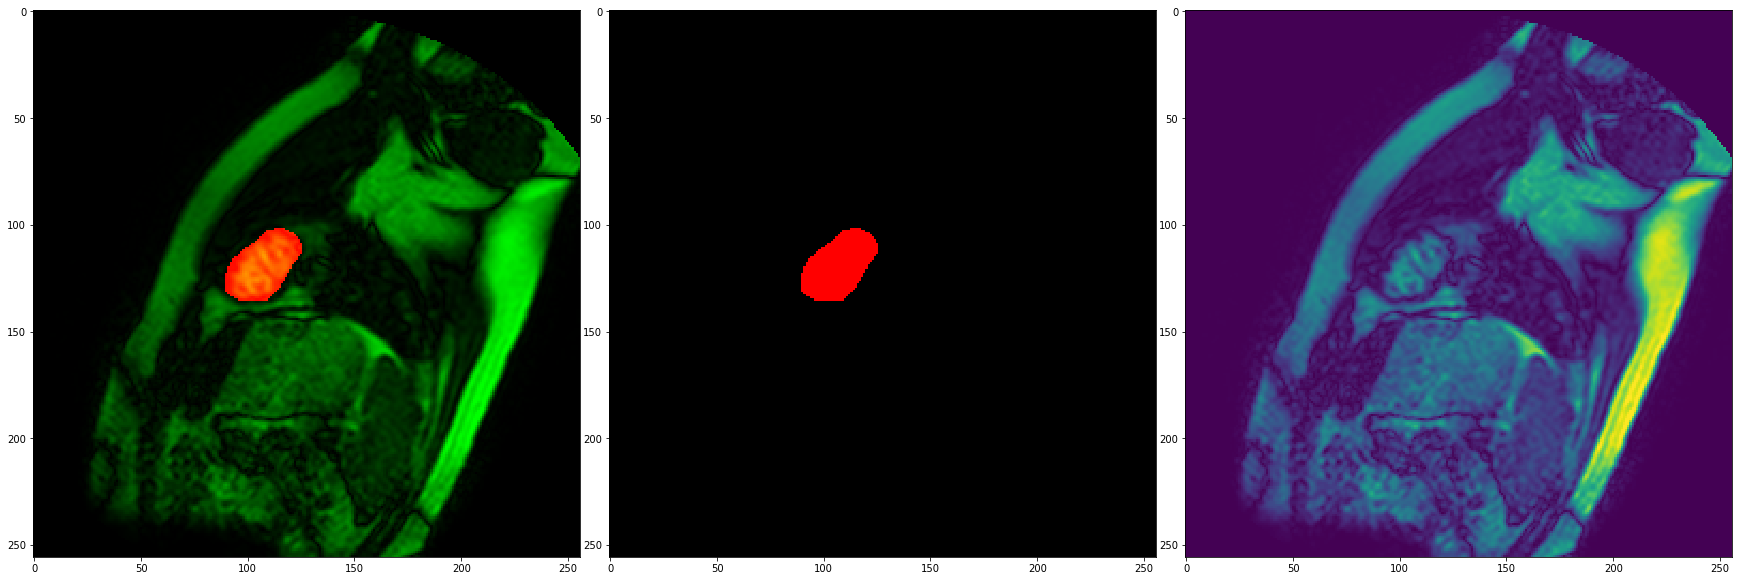

2019-03-03 11:14:49,174 INFO Image-shape: (256, 256)
2019-03-03 11:14:49,174 INFO Image data points: 49483
2019-03-03 11:14:49,174 INFO Image mean: 0.14744185808101656
2019-03-03 11:14:49,174 INFO Image max: 1.0
2019-03-03 11:14:49,174 INFO Image min: 0.0
2019-03-03 11:14:49,174 INFO Mask-shape: (256, 256, 3)
2019-03-03 11:14:49,174 INFO LV-endo-mask data points: 820
2019-03-03 11:14:49,174 INFO LV-epi-mask data points: 0
2019-03-03 11:14:49,190 INFO RV-mask data points: 0
2019-03-03 11:14:49,190 INFO LV-endo-mask mean: 0.01251220703125
2019-03-03 11:14:49,190 INFO LV-epi-mask mean: 0.0
2019-03-03 11:14:49,190 INFO RV-mask mean: 0.0


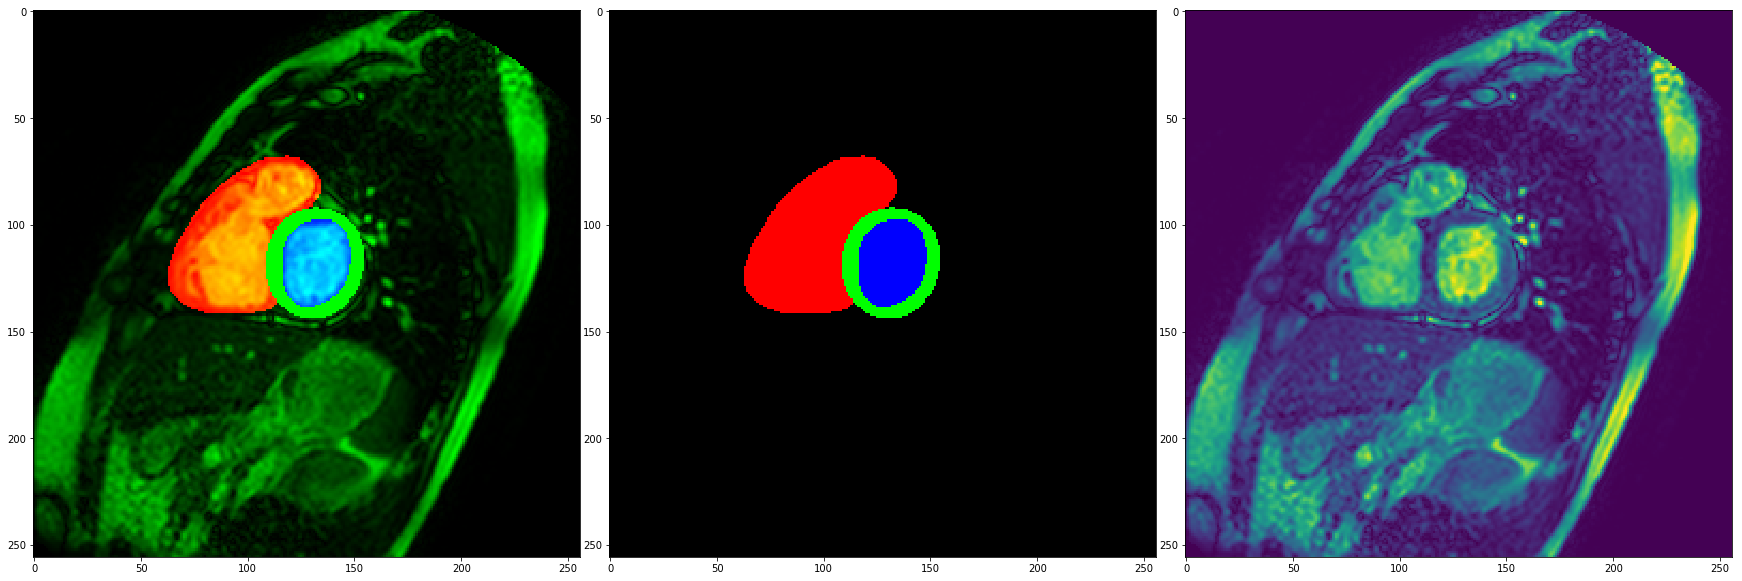

2019-03-03 11:14:50,613 INFO Image-shape: (256, 256)
2019-03-03 11:14:50,613 INFO Image data points: 57198
2019-03-03 11:14:50,628 INFO Image mean: 0.19122688725309647
2019-03-03 11:14:50,628 INFO Image max: 1.0
2019-03-03 11:14:50,628 INFO Image min: 0.0
2019-03-03 11:14:50,628 INFO Mask-shape: (256, 256, 3)
2019-03-03 11:14:50,628 INFO LV-endo-mask data points: 3159
2019-03-03 11:14:50,628 INFO LV-epi-mask data points: 839
2019-03-03 11:14:50,628 INFO RV-mask data points: 1065
2019-03-03 11:14:50,628 INFO LV-endo-mask mean: 0.0482025146484375
2019-03-03 11:14:50,628 INFO LV-epi-mask mean: 0.0128021240234375
2019-03-03 11:14:50,628 INFO RV-mask mean: 0.0162506103515625


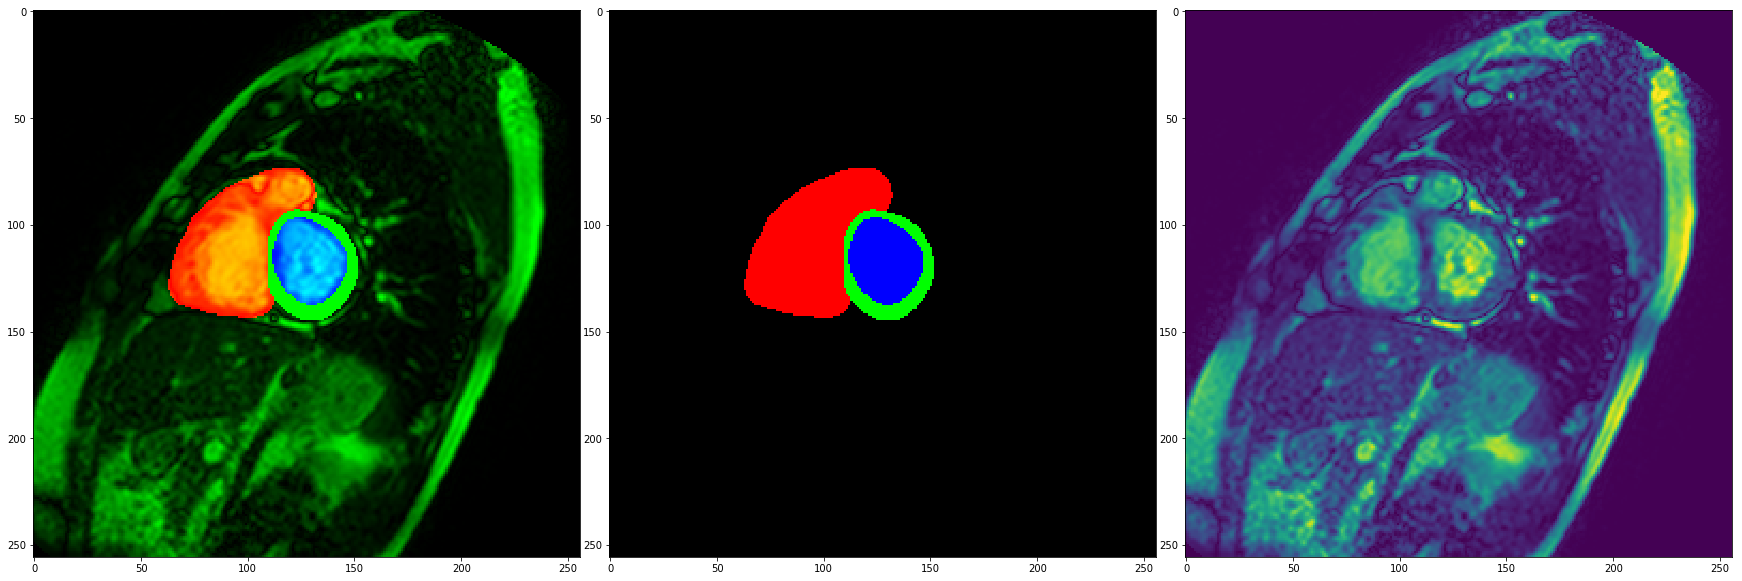

2019-03-03 11:14:52,067 INFO Image-shape: (256, 256)
2019-03-03 11:14:52,067 INFO Image data points: 58121
2019-03-03 11:14:52,067 INFO Image mean: 0.1881384117326496
2019-03-03 11:14:52,067 INFO Image max: 1.0
2019-03-03 11:14:52,067 INFO Image min: 0.0
2019-03-03 11:14:52,067 INFO Mask-shape: (256, 256, 3)
2019-03-03 11:14:52,067 INFO LV-endo-mask data points: 2879
2019-03-03 11:14:52,067 INFO LV-epi-mask data points: 676
2019-03-03 11:14:52,067 INFO RV-mask data points: 1075
2019-03-03 11:14:52,067 INFO LV-endo-mask mean: 0.0439300537109375
2019-03-03 11:14:52,067 INFO LV-epi-mask mean: 0.01031494140625
2019-03-03 11:14:52,067 INFO RV-mask mean: 0.0164031982421875


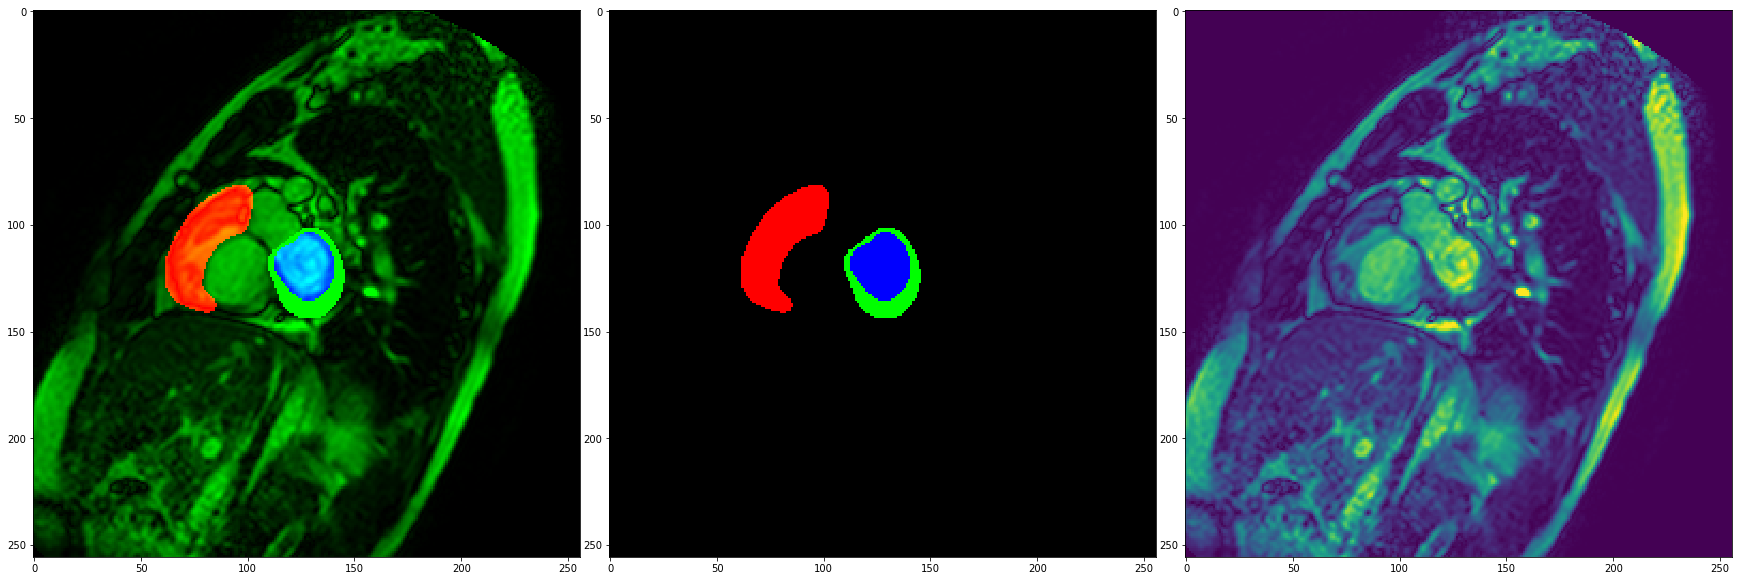

2019-03-03 11:14:53,539 INFO Image-shape: (256, 256)
2019-03-03 11:14:53,539 INFO Image data points: 58177
2019-03-03 11:14:53,539 INFO Image mean: 0.18257283379870437
2019-03-03 11:14:53,539 INFO Image max: 1.0
2019-03-03 11:14:53,539 INFO Image min: 0.0
2019-03-03 11:14:53,539 INFO Mask-shape: (256, 256, 3)
2019-03-03 11:14:53,539 INFO LV-endo-mask data points: 1264
2019-03-03 11:14:53,554 INFO LV-epi-mask data points: 482
2019-03-03 11:14:53,554 INFO RV-mask data points: 658
2019-03-03 11:14:53,554 INFO LV-endo-mask mean: 0.019287109375
2019-03-03 11:14:53,554 INFO LV-epi-mask mean: 0.007354736328125
2019-03-03 11:14:53,554 INFO RV-mask mean: 0.010040283203125


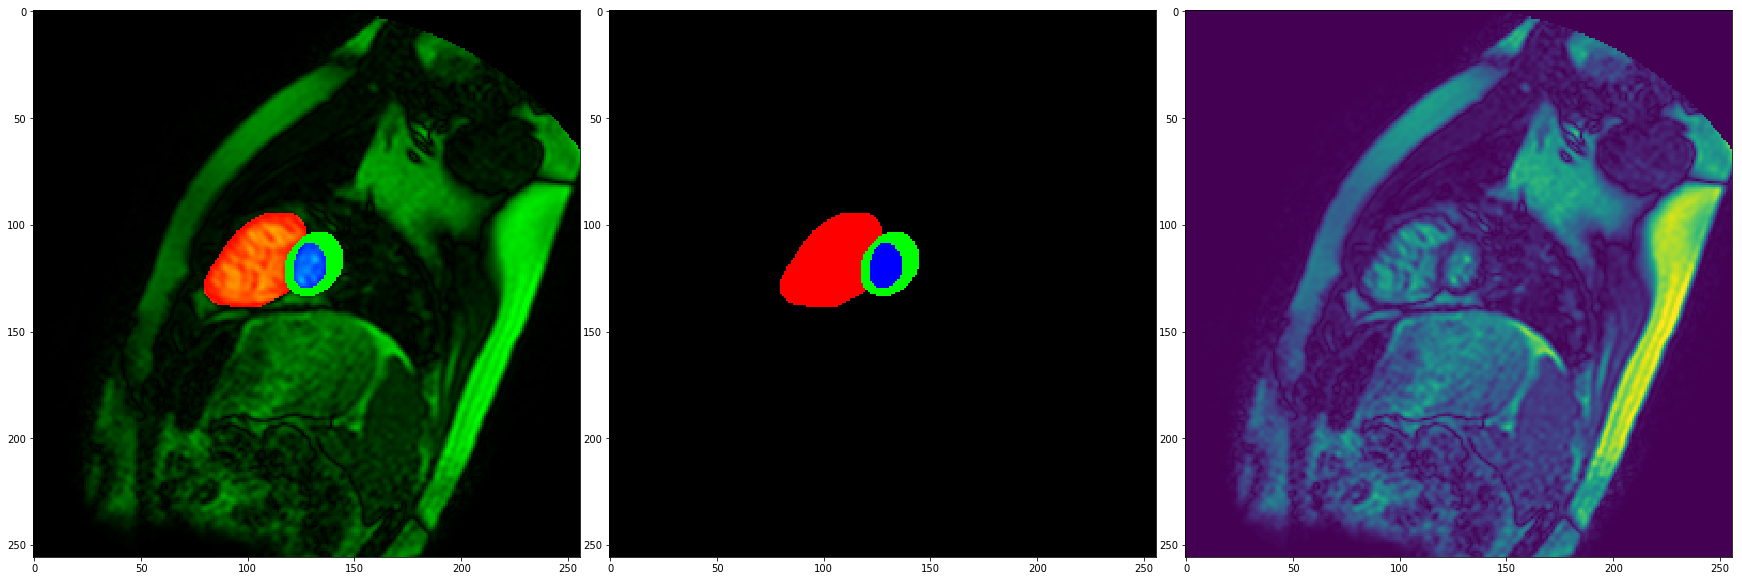

2019-03-03 11:14:54,930 INFO Image-shape: (256, 256)
2019-03-03 11:14:54,930 INFO Image data points: 50672
2019-03-03 11:14:54,930 INFO Image mean: 0.14731480162820915
2019-03-03 11:14:54,930 INFO Image max: 1.0
2019-03-03 11:14:54,930 INFO Image min: 0.0
2019-03-03 11:14:54,930 INFO Mask-shape: (256, 256, 3)
2019-03-03 11:14:54,930 INFO LV-endo-mask data points: 1402
2019-03-03 11:14:54,930 INFO LV-epi-mask data points: 380
2019-03-03 11:14:54,946 INFO RV-mask data points: 258
2019-03-03 11:14:54,946 INFO LV-endo-mask mean: 0.021392822265625
2019-03-03 11:14:54,946 INFO LV-epi-mask mean: 0.00579833984375
2019-03-03 11:14:54,946 INFO RV-mask mean: 0.003936767578125


In [31]:
image_s, mask_s = load_data('data/processed/small/test/', create=False)
for img, mask in zip(image_s[:5], mask_s[:5]):
    show_slice(img.load(), mask.load())

IndexError: invalid index